
This project is for secretory proteins - for human and mouse as focussed species .The idea is that we consider the NM_ids_human file and we split it into 
three list randomly

In summary:

We start with X number of human secretory genes.
These genes are initially split into three groups: 85%, 10%, and 5%.
The 85% group will be further divided in the subsequent step.
The 10% is designated for evaluation.
The 5% is reserved for benchmark genes (prediction task).
Considering the 85% group as 100%, it's then split into two groups: 80% for training the model and 20% for testing the model.
By adopting this percentage-based approach, we can maintain a universal standard ratio for splitting, providing flexibility and steering clear of rigid numerical constraints.



human_secretome_NM_ids excel file:

- the symbol is sorted alphabetically and the
serpina family alone is highlighted 
so that these alone can be manually 
be added in the validation or as the benchmark genes


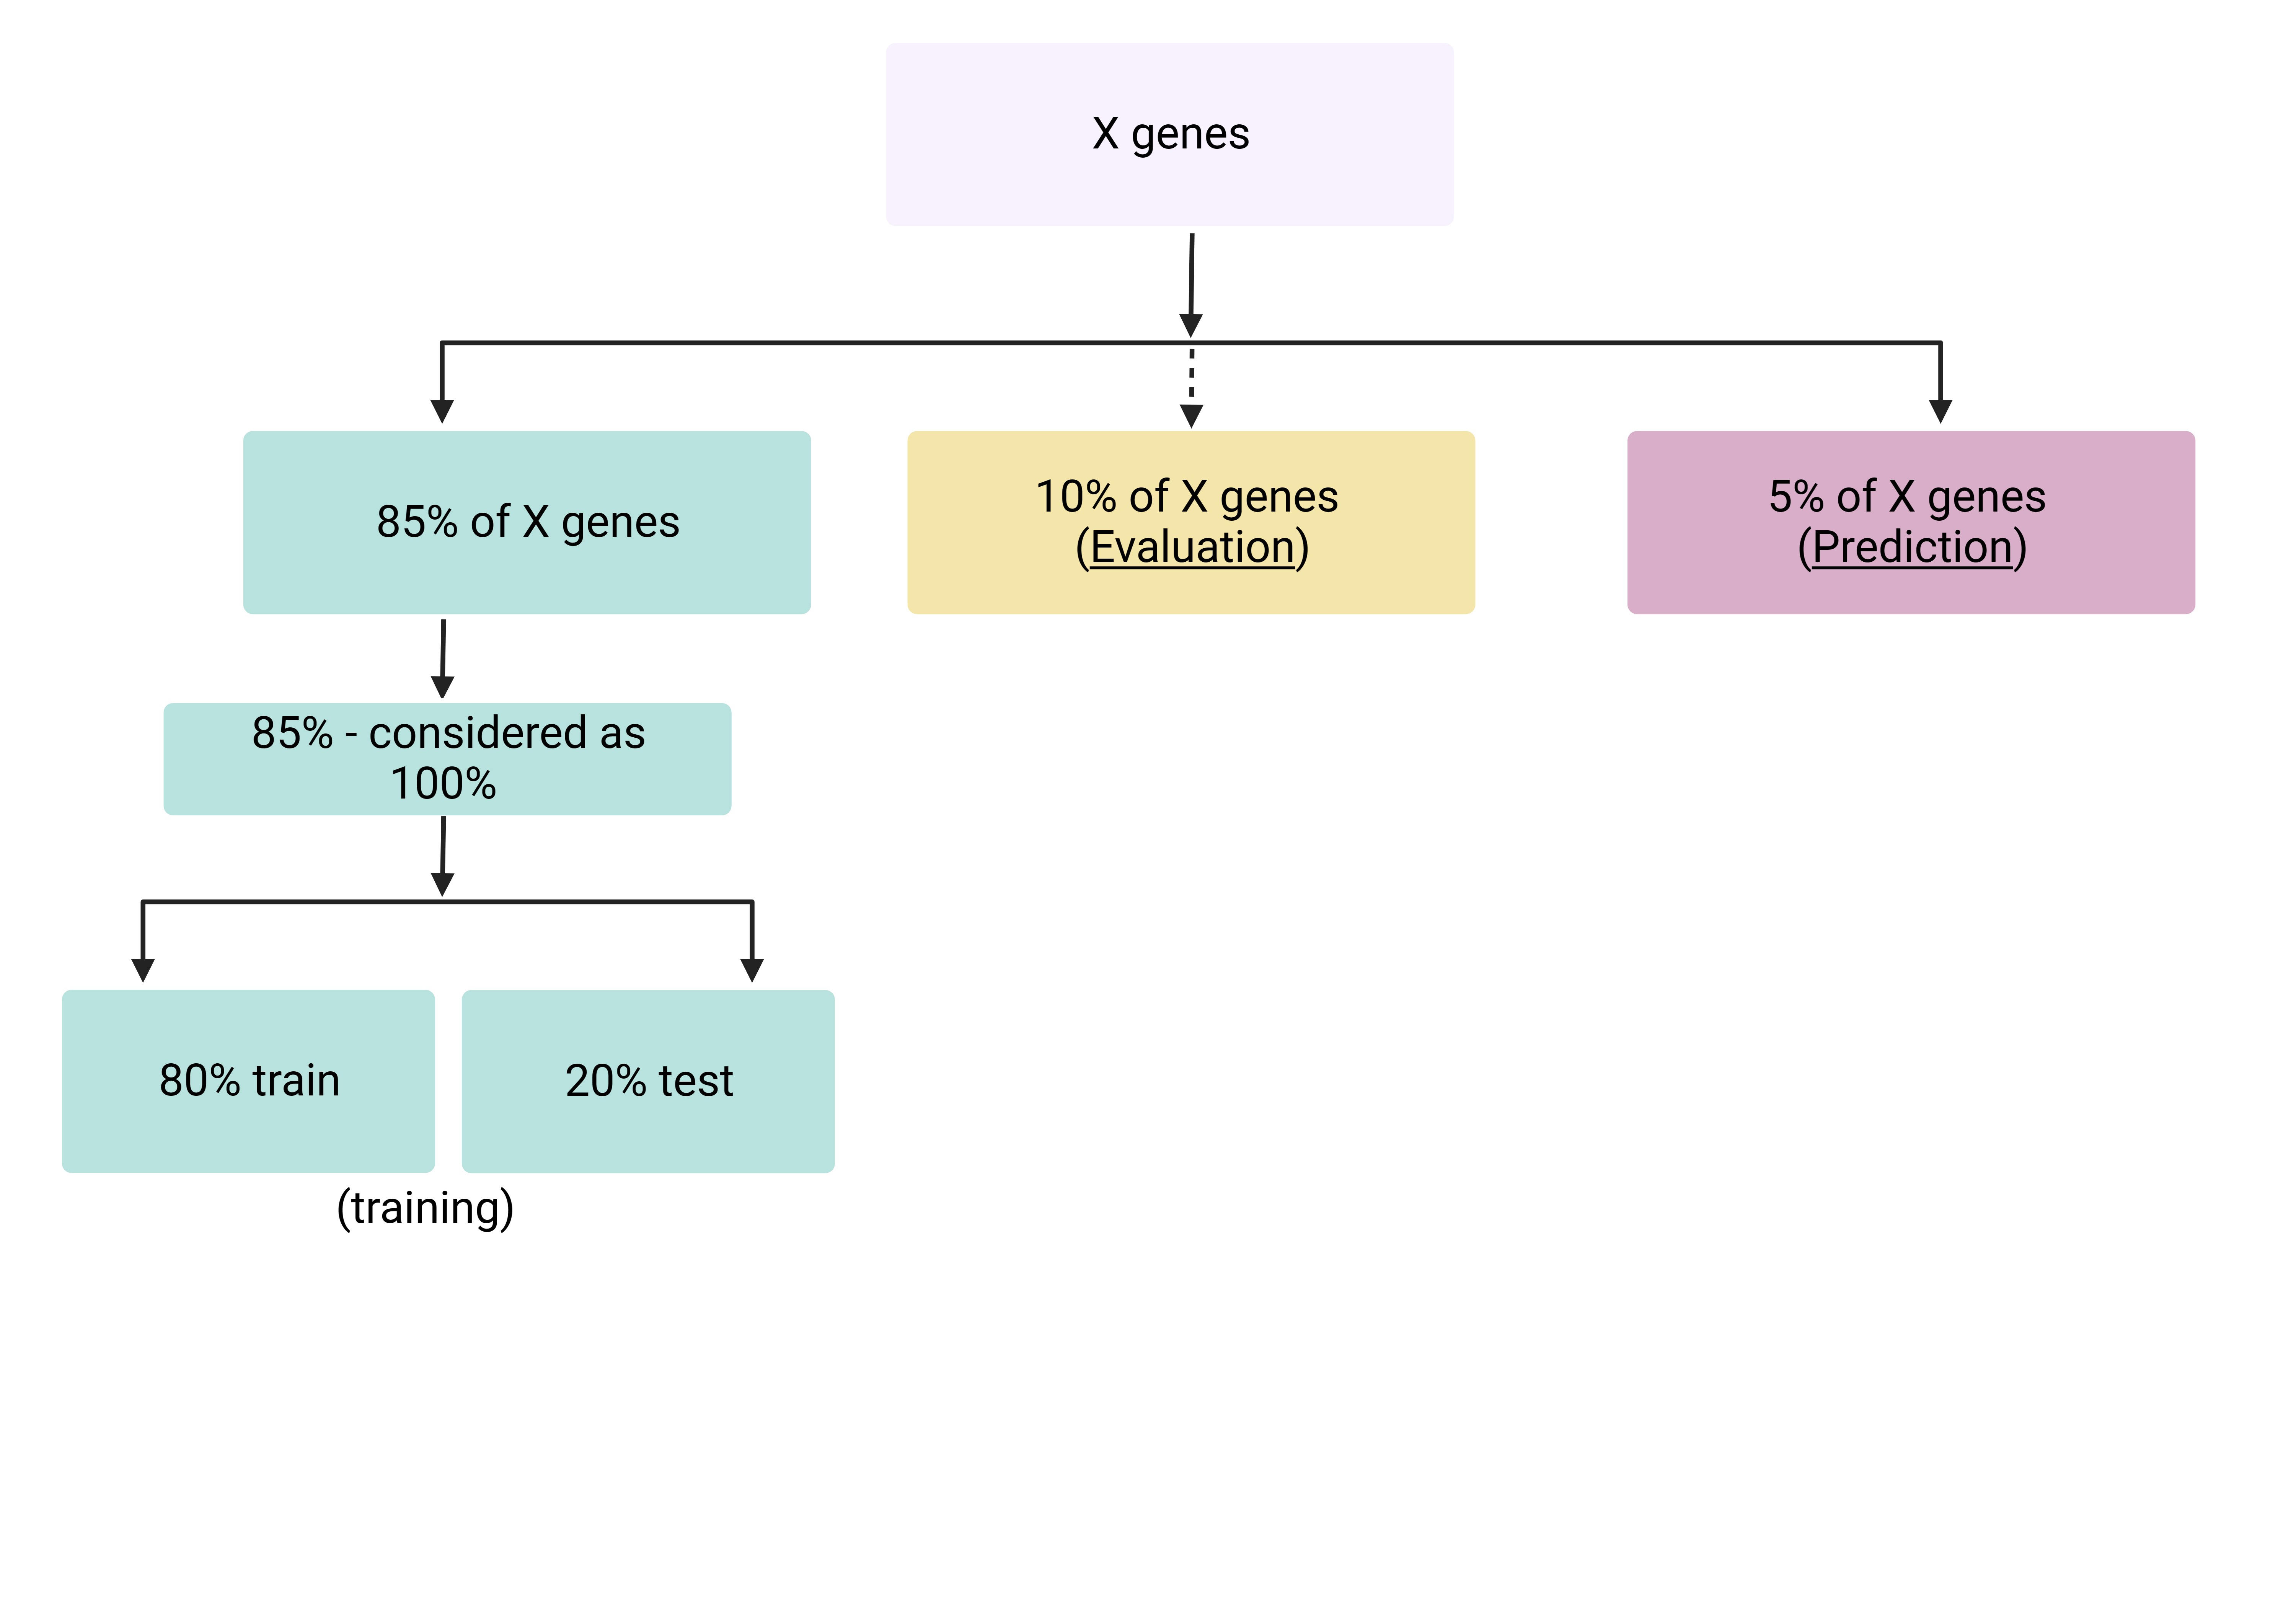


first step is use the NM_ids_human file and we split it into three list randomly
1. train_NM_list
2. eval_NM_list
3. predict_NM_list

save these in the corresponding folders 

for each of the training,evaluation and prediction genes, use the following steps :
#use the NM_ids saved in each of the corresponding training,evaluation and prediction folder to get the 
sequences and save it in fasta files - trainingseq.fasta,evalseq.fasta,predictseq.fasta

#then once you have the corresponding fasta files in each folder, do the pre-processing of the following:


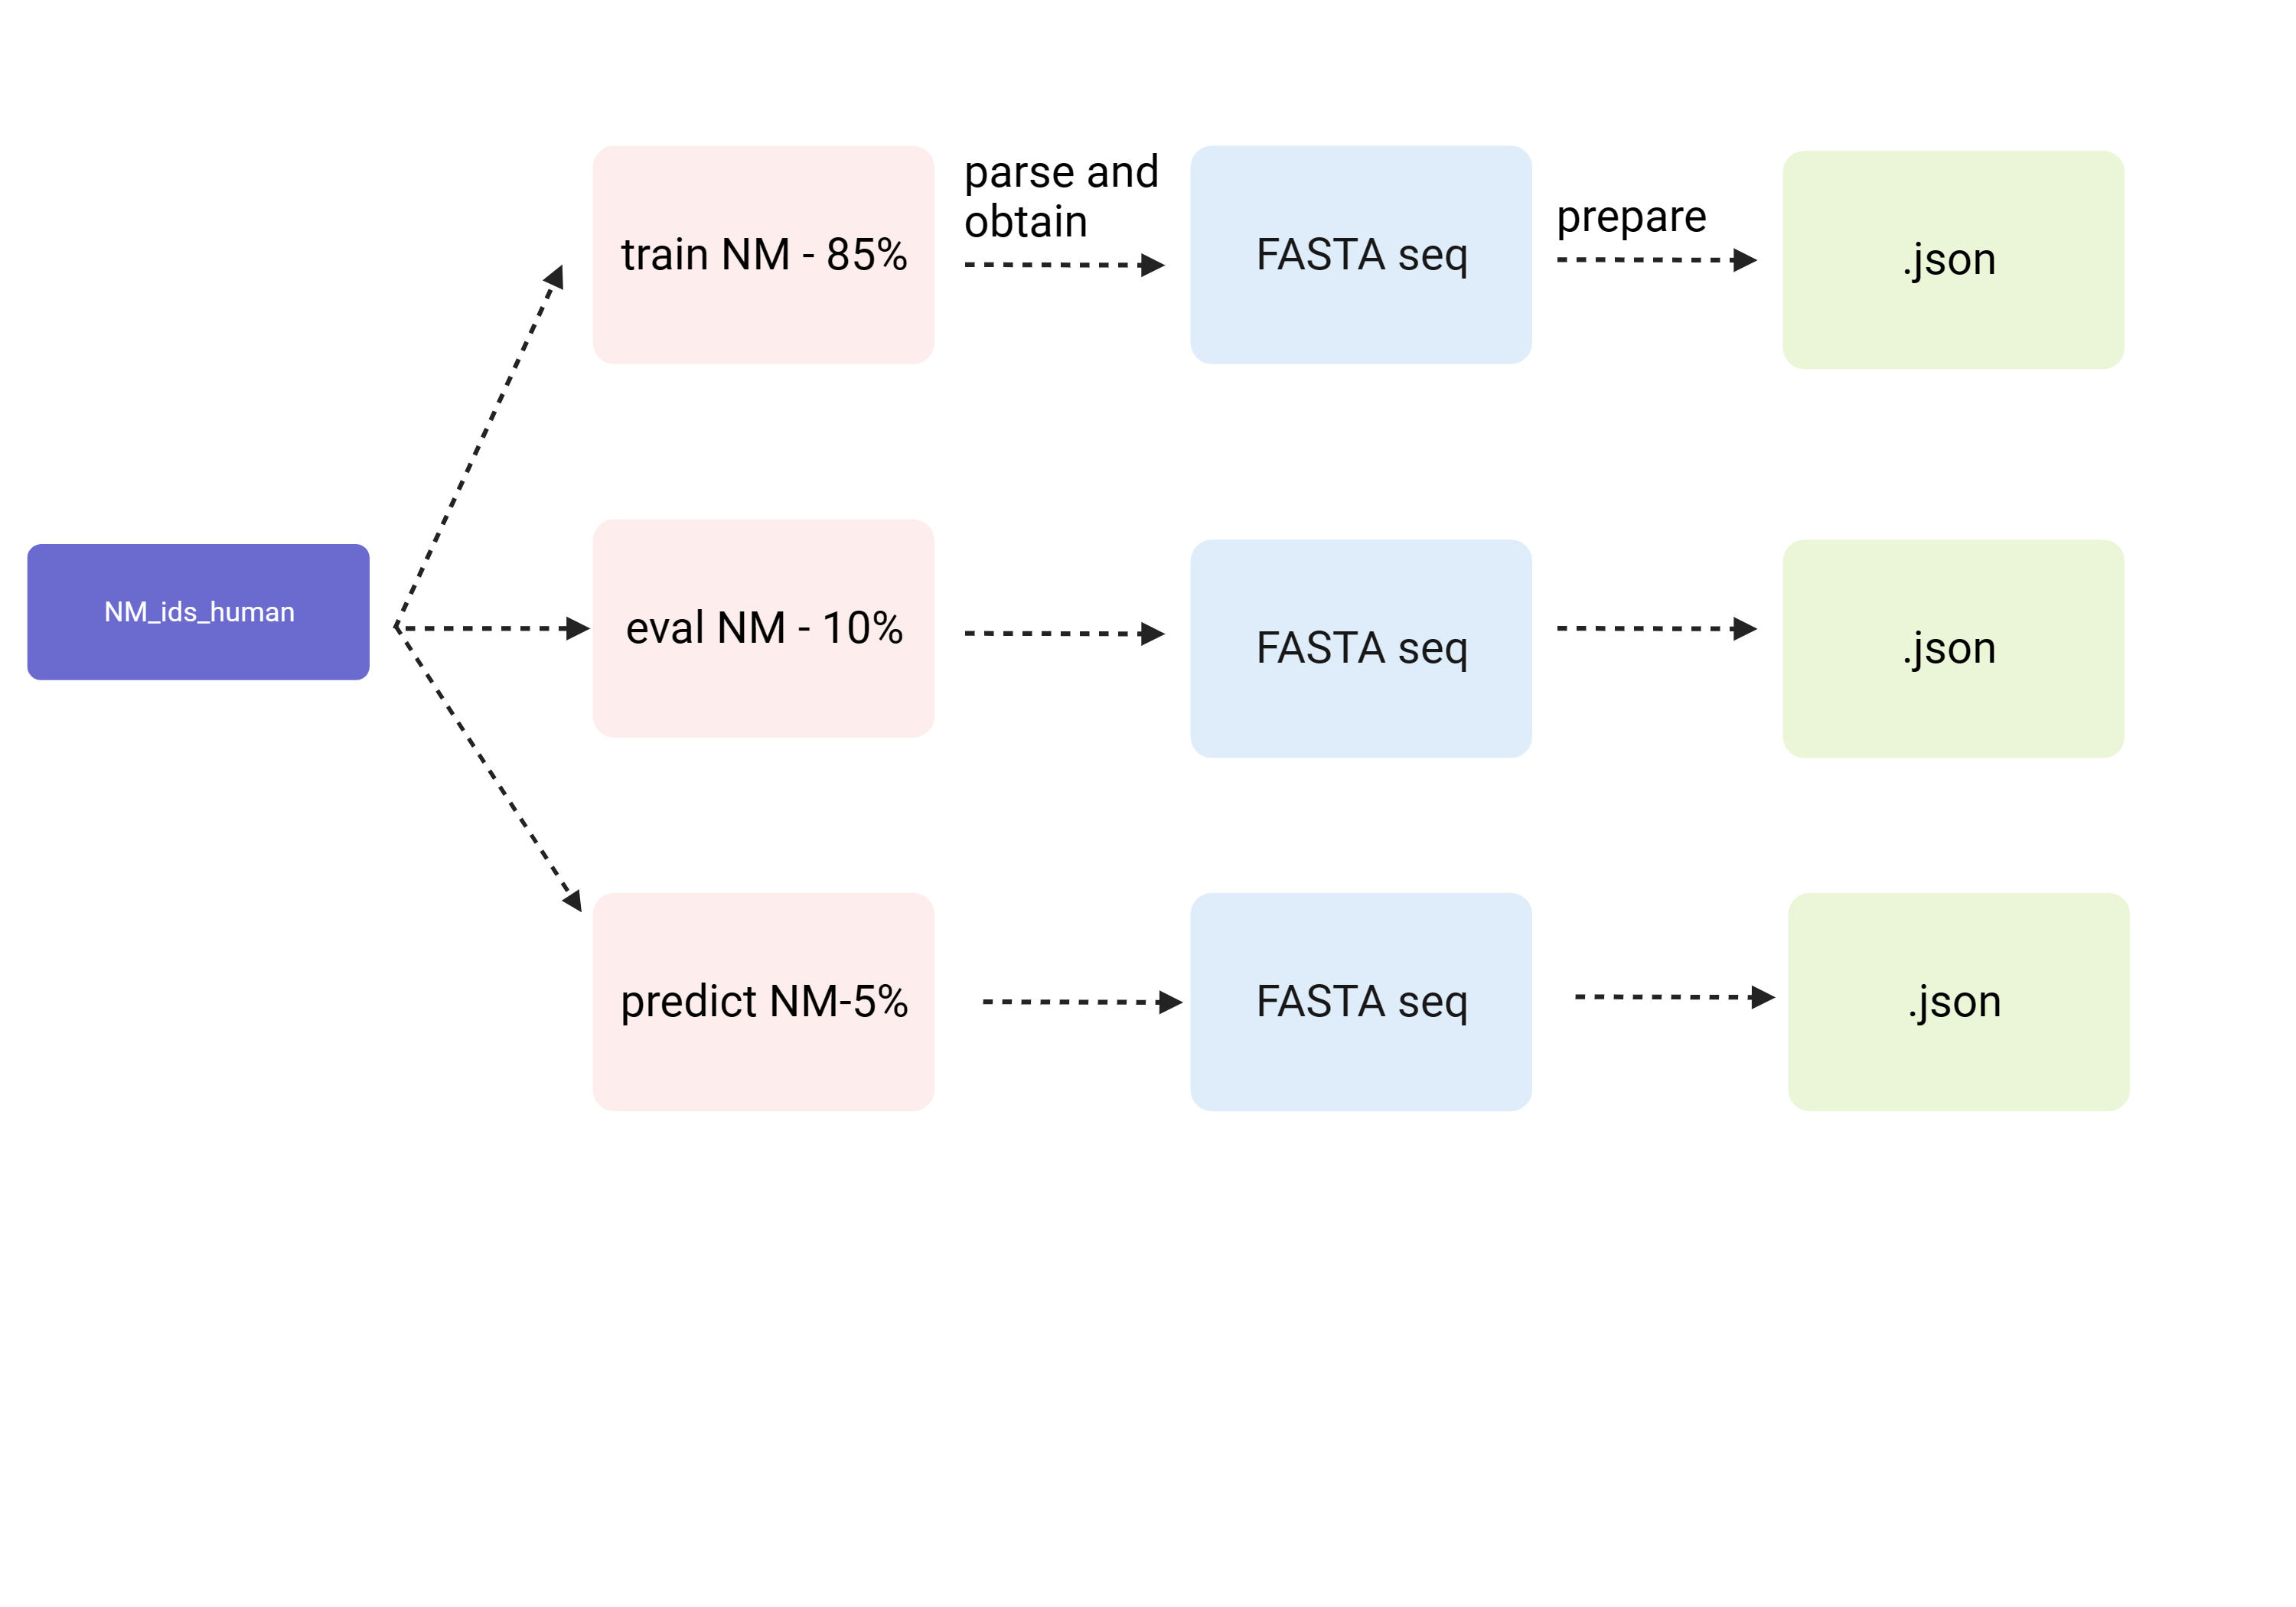



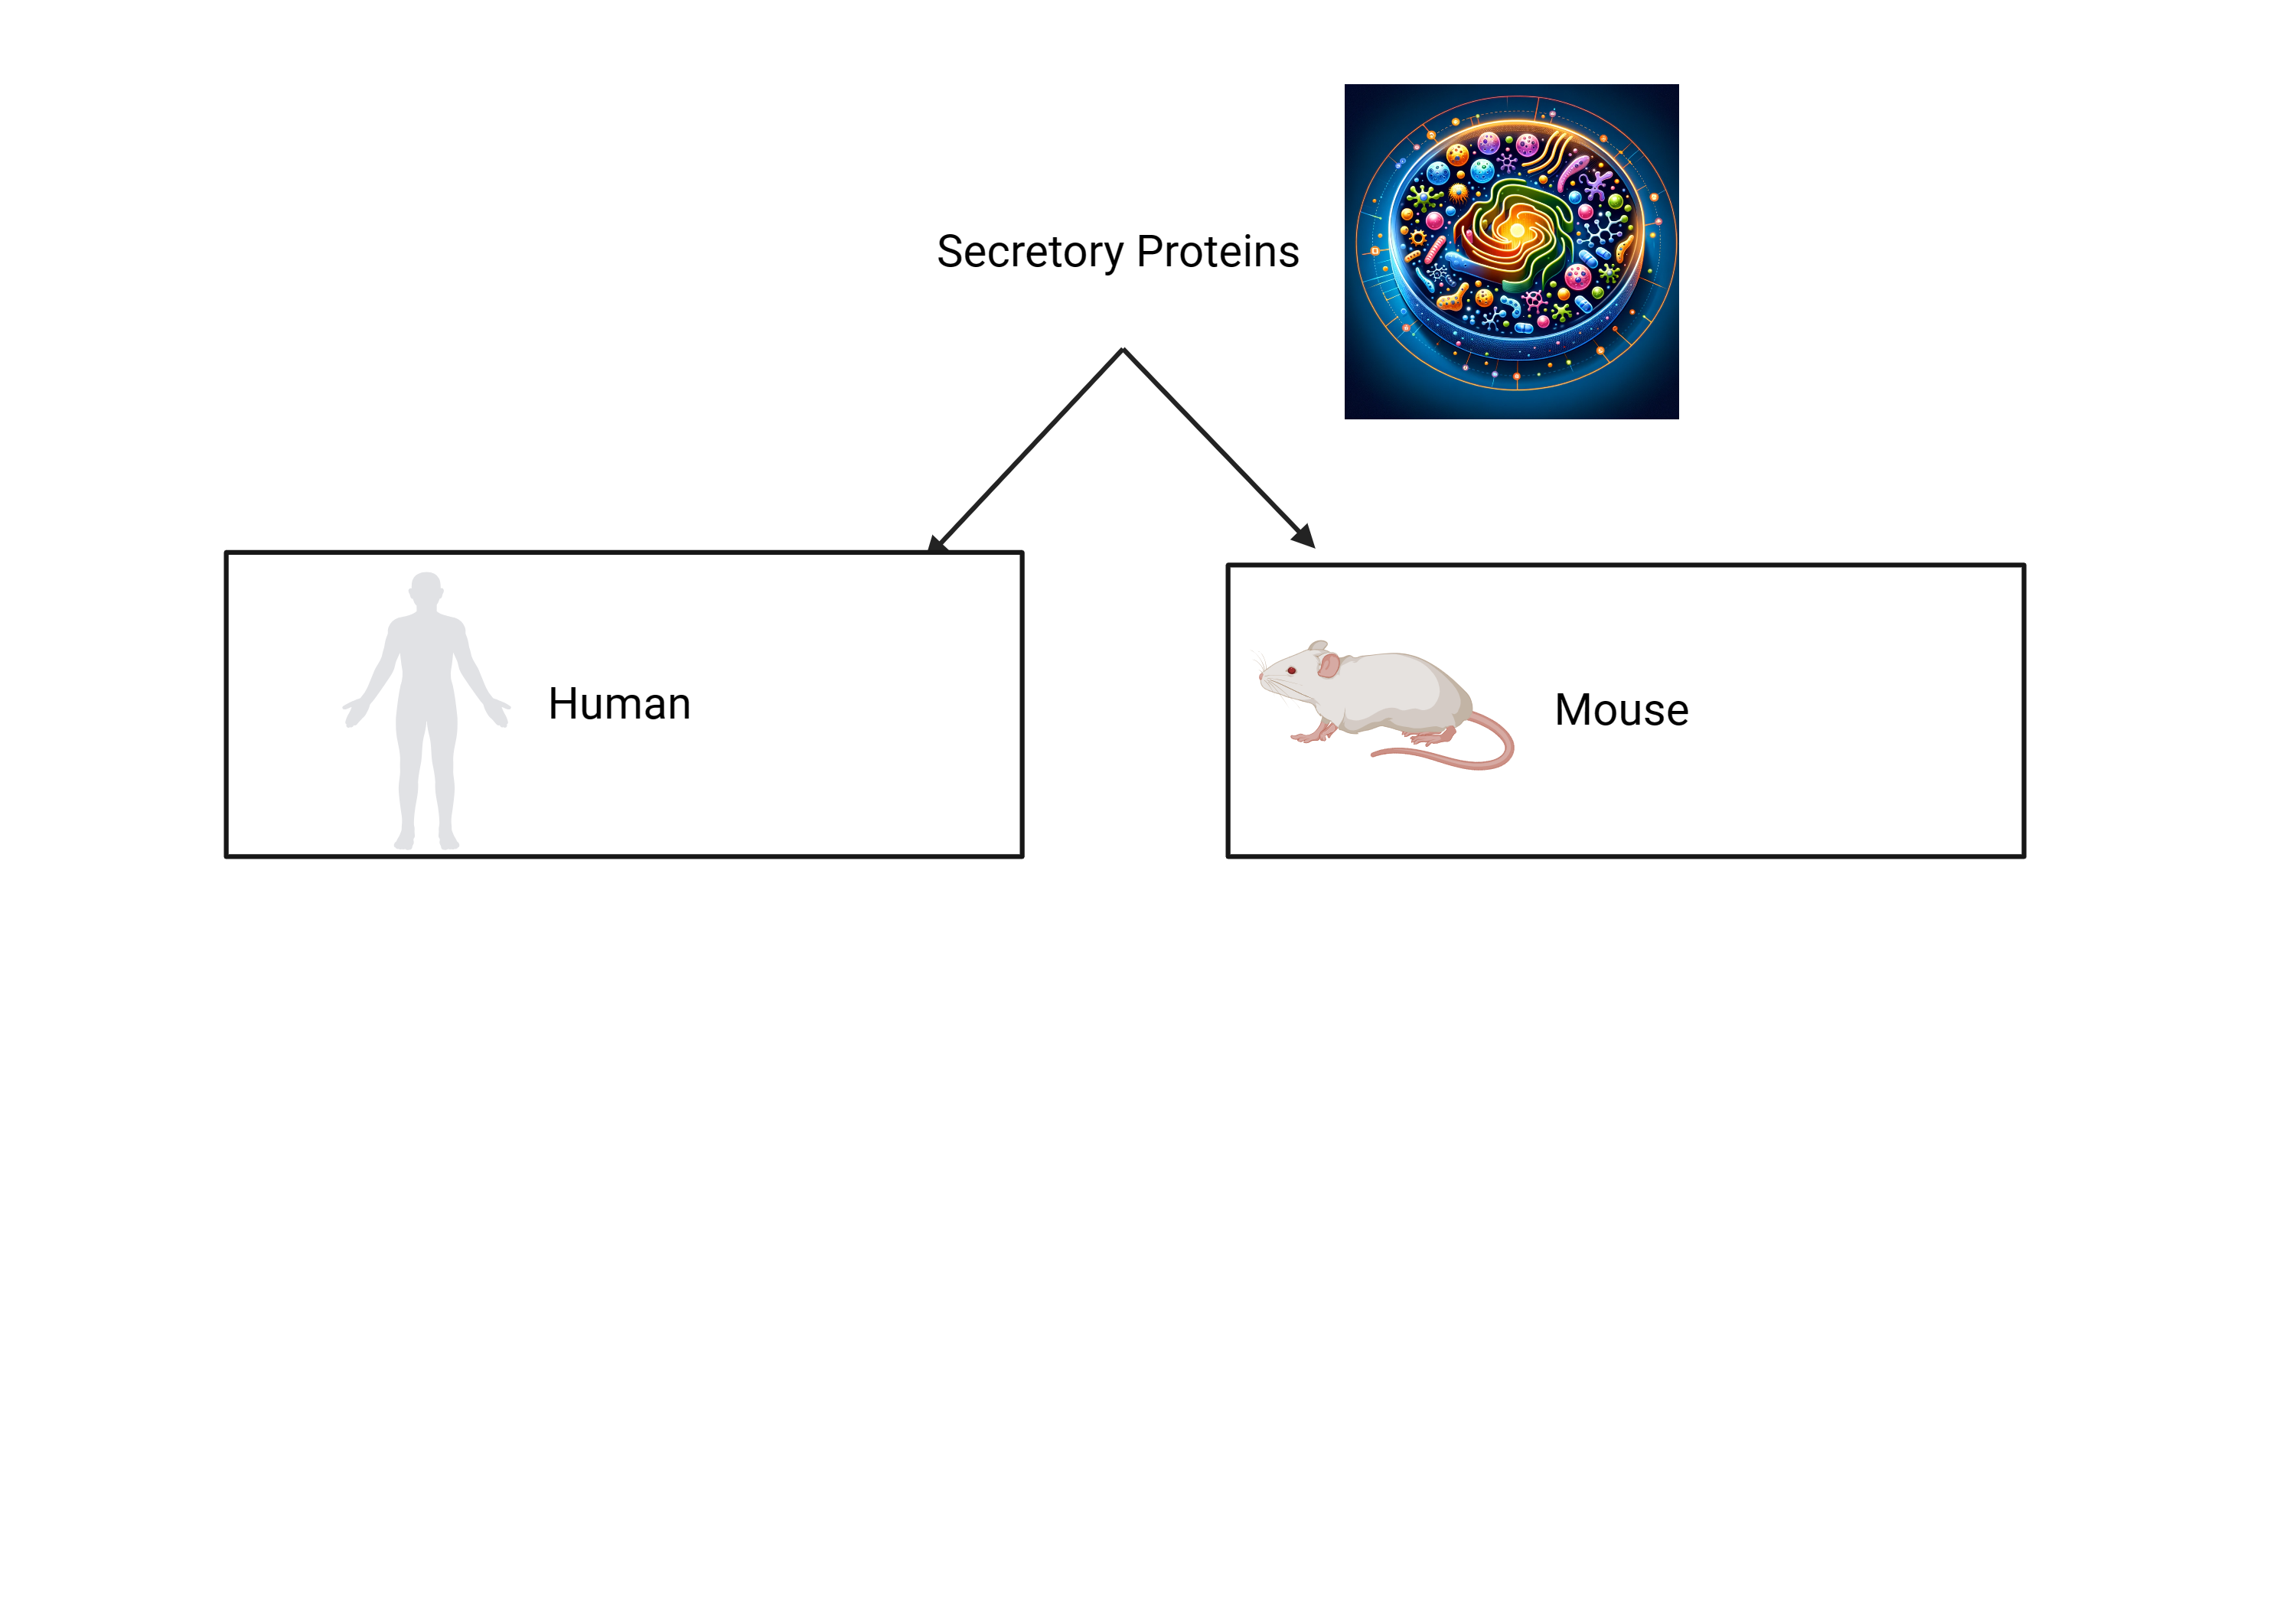

## Split the overall data randomly into three separate datasets 
    - this is the first step where we split the dataset into training, evaluation and prediction data
    - although internally when json files are created we do split the data into randomly 
    - still this step is done to ensure that we take away the prediction genes in the initial step itself

In [1]:

#Script to split the data randomly
import random
import os

def split_file_for_notebook(input_file_path):
    # Read the contents of the file
    with open(input_file_path, "r") as file:
        nm_ids = file.readlines()

    # Shuffle the list to ensure randomness
    random.shuffle(nm_ids)

    # Calculate the sizes for each split
    train_size = int(0.85 * len(nm_ids))
    eval_size = int(0.10 * len(nm_ids))

    # Split the list
    train_nm = nm_ids[:train_size]
    eval_nm = nm_ids[train_size:train_size + eval_size]
    pred_nm = nm_ids[train_size + eval_size:]

    # Determine the directory for saving the output files
    output_dir = os.path.dirname(input_file_path)

    # Write to respective files
    for file_name, data in zip(["training_NM.txt", "evaluation_NM.txt", "Prediction_NM.txt"], 
                               [train_nm, eval_nm, pred_nm]):
        file_path = os.path.join(output_dir, file_name)
        with open(file_path, "w") as file:
            file.writelines(data)



In [2]:
#for human list
input_path = 'C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/secretory proteins/Human/NM_ids_humna.txt'
split_file_for_notebook(input_path)





In [ ]:
pip install Biopython

## Download the sequences in fasta file
    - for the NM ids we need to get the corresponding sequences in fasta format

In [1]:
from Bio import Entrez, SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from collections import defaultdict

def download_transcripts(list_file, email_address="", outfile="human.fasta"): 
    """Download transcripts from a file of list identifiers"""

    Entrez.email = email_address 
    with open(list_file, "r") as fp: 
        ids = [i.strip() for i in fp.readlines()]

    handle = Entrez.efetch(db="nucleotide", 
                           id=ids,
                           retmode="xml", 
                           strand=1)

    output = Entrez.parse(handle)
    seqs = []
    for entry in output:
        organism = entry.get("GBSeq_organism", "Unknown organism")
        print(f"Organism for {entry['GBSeq_locus']}: {organism}")
        
        feat_tbl = entry["GBSeq_feature-table"]
        num_cds = 0 
        for j in feat_tbl: 
            if j['GBFeature_key'] == "CDS": 
                num_cds += 1
                cds = j["GBFeature_location"]

                cds_loc = j['GBFeature_intervals']
                start = int(cds_loc[0]['GBInterval_from'])
                end = int(cds_loc[0]['GBInterval_to'])
                seq = entry["GBSeq_sequence"][start - 1 : end]
        if num_cds != 1: 
            print("Error: Too many CDS found", num_cds)
        seqs.append(SeqRecord(Seq(seq), 
                              id=entry['GBSeq_locus'],
                              description=entry["GBSeq_definition"]
                              )
                    )
    handle.close()
    with open(outfile, "w") as output_handle:
        SeqIO.write(seqs, output_handle, "fasta")



In [2]:

#for training genes - get the FASTA sequences
# You can replace these values with the desired input and output paths.
list_file_path ="C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/secretory proteins/Human/training_NM.txt" # Replace with your input file path

output_file_path = "C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/secretory proteins/Human/training_NMseclist.fasta"  # Replace with your desired output file path
email_address = "sandhiya.ravi1@umassmed.edu"  # Replace with your email address

download_transcripts(list_file_path, email_address=email_address, outfile=output_file_path)




Organism for NM_002081: Homo sapiens
Organism for NM_001256560: Homo sapiens
Organism for NM_001329754: Homo sapiens
Organism for NM_182528: Homo sapiens
Organism for NM_020163: Homo sapiens
Organism for NM_025237: Homo sapiens
Organism for NM_001002029: Homo sapiens
Organism for NM_001040272: Homo sapiens
Organism for NM_000562: Homo sapiens
Organism for NM_002620: Homo sapiens
Organism for NM_001199149: Homo sapiens
Organism for NM_002984: Homo sapiens
Organism for NM_001014980: Homo sapiens
Organism for NM_001996: Homo sapiens
Organism for NM_148961: Homo sapiens
Organism for NM_031909: Homo sapiens
Organism for NM_001134456: Homo sapiens
Organism for NM_001346011: Homo sapiens
Organism for NM_001286138: Homo sapiens
Organism for NM_001195797: Homo sapiens
Organism for NM_002415: Homo sapiens
Organism for NM_001136032: Homo sapiens
Organism for NM_001282863: Homo sapiens
Organism for NM_001145938: Homo sapiens
Organism for NM_001037730: Homo sapiens
Organism for NM_001040448: Homo s

Organism for NM_004887: Homo sapiens
Organism for NM_000490: Homo sapiens
Organism for NM_001128215: Homo sapiens
Organism for NM_198510: Homo sapiens
Organism for NM_002820: Homo sapiens
Organism for NM_016204: Homo sapiens
Organism for NM_003619: Homo sapiens
Organism for NM_001381939: Homo sapiens
Organism for NM_001146254: Homo sapiens
Organism for NM_001318781: Homo sapiens
Organism for NM_001166434: Homo sapiens
Organism for NM_024409: Homo sapiens
Organism for NM_001261399: Homo sapiens
Organism for NM_001170690: Homo sapiens
Organism for NM_001244847: Homo sapiens
Organism for NM_001368990: Homo sapiens
Organism for NM_178449: Homo sapiens
Organism for NM_005562: Homo sapiens
Organism for NM_001042544: Homo sapiens
Organism for NM_032411: Homo sapiens
Organism for NM_001082967: Homo sapiens
Organism for NM_000362: Homo sapiens
Organism for NM_001385165: Homo sapiens
Organism for NM_001134434: Homo sapiens
Organism for NM_001330163: Homo sapiens
Organism for NM_002521: Homo sapi

Organism for NM_001318046: Homo sapiens
Organism for NM_001079808: Homo sapiens
Organism for NM_001143981: Homo sapiens
Organism for NM_001256125: Homo sapiens
Organism for NM_002427: Homo sapiens
Organism for NM_006688: Homo sapiens
Organism for NM_001994: Homo sapiens
Organism for NM_006944: Homo sapiens
Organism for NM_000595: Homo sapiens
Organism for NM_001370125: Homo sapiens
Organism for NM_080830: Homo sapiens
Organism for NM_003823: Homo sapiens
Organism for NM_000589: Homo sapiens
Organism for NM_024746: Homo sapiens
Organism for NM_004271: Homo sapiens
Organism for NM_001321386: Homo sapiens
Organism for NM_153692: Homo sapiens
Organism for NM_001304797: Homo sapiens
Organism for NM_001002915: Homo sapiens
Organism for NM_001252607: Homo sapiens
Organism for NM_001319065: Homo sapiens
Organism for NM_001010886: Homo sapiens
Organism for NM_001394997: Homo sapiens
Organism for NM_001025197: Homo sapiens
Organism for NM_001163771: Homo sapiens
Organism for NM_006172: Homo sapi

Organism for NM_001297439: Homo sapiens
Organism for NM_001257135: Homo sapiens
Organism for NM_001201528: Homo sapiens
Organism for NM_152718: Homo sapiens
Organism for NM_139074: Homo sapiens
Organism for NM_001318818: Homo sapiens
Organism for NM_001101372: Homo sapiens
Organism for NM_138283: Homo sapiens
Organism for NM_003714: Homo sapiens
Organism for NM_002191: Homo sapiens
Organism for NM_052972: Homo sapiens
Organism for NM_001301009: Homo sapiens
Organism for NM_001215: Homo sapiens
Organism for NM_001042439: Homo sapiens
Organism for NM_001199: Homo sapiens
Organism for NM_001304964: Homo sapiens
Organism for NM_133638: Homo sapiens
Organism for NM_001164379: Homo sapiens
Organism for NM_004158: Homo sapiens
Organism for NM_001371936: Homo sapiens
Organism for NM_003019: Homo sapiens
Organism for NM_207413: Homo sapiens
Organism for NM_006108: Homo sapiens
Organism for NM_001972: Homo sapiens
Organism for NM_001079807: Homo sapiens
Organism for NM_001198695: Homo sapiens
Or

Organism for NM_001063: Homo sapiens
Organism for NM_000596: Homo sapiens
Organism for NM_001318798: Homo sapiens
Organism for NM_001278563: Homo sapiens
Organism for NM_001304359: Homo sapiens
Organism for NM_005217: Homo sapiens
Organism for NM_030775: Homo sapiens
Organism for NM_007115: Homo sapiens
Organism for NM_001898: Homo sapiens
Organism for NM_021999: Homo sapiens
Organism for NM_001303137: Homo sapiens
Organism for NM_001848: Homo sapiens
Organism for NM_001172425: Homo sapiens
Organism for NM_001710: Homo sapiens
Organism for NM_002934: Homo sapiens
Organism for NM_198180: Homo sapiens
Organism for NM_001323369: Homo sapiens
Organism for NM_001361665: Homo sapiens
Organism for NM_001612: Homo sapiens
Organism for NM_001387438: Homo sapiens
Organism for NM_001330312: Homo sapiens
Organism for NM_001195683: Homo sapiens
Organism for NM_001393581: Homo sapiens
Organism for NM_001030013: Homo sapiens
Organism for NM_001199640: Homo sapiens
Organism for NM_001134470: Homo sapi

Organism for NM_001395277: Homo sapiens
Organism for NM_032020: Homo sapiens
Organism for NM_002177: Homo sapiens
Organism for NM_173619: Homo sapiens
Organism for NM_000759: Homo sapiens
Organism for NM_001002923: Homo sapiens
Organism for NM_001165928: Homo sapiens
Organism for NM_001900: Homo sapiens
Organism for NM_001243193: Homo sapiens
Organism for NM_001271946: Homo sapiens
Organism for NM_004386: Homo sapiens
Organism for NM_032319: Homo sapiens
Organism for NM_000557: Homo sapiens
Organism for NM_145651: Homo sapiens
Organism for NM_001286423: Homo sapiens
Organism for NM_006010: Homo sapiens
Organism for NM_002059: Homo sapiens
Organism for NM_001206838: Homo sapiens
Organism for NM_000582: Homo sapiens
Organism for NM_001008270: Homo sapiens
Organism for NM_001379306: Homo sapiens
Organism for NM_001301054: Homo sapiens
Organism for NM_001308394: Homo sapiens
Organism for NM_001285: Homo sapiens
Organism for NM_016441: Homo sapiens
Organism for NM_004942: Homo sapiens
Organ

Organism for NM_012242: Homo sapiens
Organism for NM_001303414: Homo sapiens
Organism for NM_001177388: Homo sapiens
Organism for NM_003880: Homo sapiens
Organism for NM_001907: Homo sapiens
Organism for NM_005429: Homo sapiens
Organism for NM_001130167: Homo sapiens


In [3]:
#for evaluation genes - get the FASTA sequences
# You can replace these values with the desired input and output paths.
list_file_path = "C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/secretory proteins/Human/evaluation_NM.txt"  # Replace with your input file path
output_file_path = "C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/secretory proteins/Human/evaluation_NMseclist.fasta"  # Replace with your desired output file path
email_address = "sandhiya.ravi1@umassmed.edu"  # Replace with your email address

download_transcripts(list_file_path, email_address=email_address, outfile=output_file_path)

Organism for NM_000415: Homo sapiens
Organism for NM_001166598: Homo sapiens
Organism for NM_015893: Homo sapiens
Organism for NM_001409: Homo sapiens
Organism for NM_001392019: Homo sapiens
Organism for NM_004139: Homo sapiens
Organism for NM_002995: Homo sapiens
Organism for NM_001347990: Homo sapiens
Organism for NM_002345: Homo sapiens
Organism for NM_001270780: Homo sapiens
Organism for NM_000737: Homo sapiens
Organism for NM_001012333: Homo sapiens
Organism for NM_023002: Homo sapiens
Organism for NM_207373: Homo sapiens
Organism for NM_001395506: Homo sapiens
Organism for NM_001868: Homo sapiens
Organism for NM_001135599: Homo sapiens
Organism for NM_030753: Homo sapiens
Organism for NM_000542: Homo sapiens
Organism for NM_182828: Homo sapiens
Organism for NM_001168319: Homo sapiens
Organism for NM_021010: Homo sapiens
Organism for NM_002023: Homo sapiens
Organism for NM_001318124: Homo sapiens
Organism for NM_001300812: Homo sapiens
Organism for NM_002900: Homo sapiens
Organism

In [4]:
#for prediction genes - get the FASTA sequences
# You can replace these values with the desired input and output paths.
list_file_path = "C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/secretory proteins/Human/Prediction_NM.txt"  # Replace with your input file path
output_file_path = "C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/secretory proteins/Human/prediction_NMseclist.fasta"  # Replace with your desired output file path
email_address = "sandhiya.ravi1@umassmed.edu"  # Replace with your email address

download_transcripts(list_file_path, email_address=email_address, outfile=output_file_path)

Organism for NM_001831: Homo sapiens
Organism for NM_003175: Homo sapiens
Organism for NM_021221: Homo sapiens
Organism for NM_001289032: Homo sapiens
Organism for NM_006652: Homo sapiens
Organism for NM_001195685: Homo sapiens
Organism for NM_001040159: Homo sapiens
Organism for NM_001407240: Homo sapiens
Organism for NM_006274: Homo sapiens
Organism for NM_017413: Homo sapiens
Organism for NM_001172439: Homo sapiens
Organism for NM_004625: Homo sapiens
Organism for NM_172005: Homo sapiens
Organism for NM_001379604: Homo sapiens
Organism for NM_001031705: Homo sapiens
Organism for NM_001037380: Homo sapiens
Organism for NM_001032392: Homo sapiens
Organism for NM_138481: Homo sapiens
Organism for NM_001304461: Homo sapiens
Organism for NM_001085: Homo sapiens
Organism for NM_000624: Homo sapiens
Organism for NM_002007: Homo sapiens
Organism for NM_001005915: Homo sapiens
Organism for NM_178127: Homo sapiens
Organism for NM_001177355: Homo sapiens
Organism for NM_000606: Homo sapiens
Or

## pre-processing data 
- to get the .json files 
- this has to be done only for training and evaluation genes 

In [5]:
#for training genes - pre-process and get the json file

import json
import numpy as np
import pandas as pd
from Bio import SeqIO 
import random
from collections import OrderedDict

# Initialize lists and define acceptable DNA bases and amino acids.
dna_seq = []
dna_seq_new = []
aa_seq_new = []
bases = ['A','C','G','T']
residues = ['A','R','N','D','C','Q','E','G','H','I','L','K','M','F','P','S','T','W','Y','V','B','Z','X']

   
# Initialize list of tests to verify properties of the DNA and AA sequences.
test_total = [0,0,0,0,0,0,0]

# Import starting list of DNA sequences from fasta file containing human CDS sequences.
for sequence in SeqIO.parse('C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/secretory proteins/Human/training_NMseclist.fasta','fasta'):
    dna_seq.append(sequence.seq.upper())

# Verify properties of DNA sequences and their resulting AA sequences. 
# If all tests pass (0), DNA and AA sequences are inserted into matching indices of two new lists. 
for sequence in dna_seq:

    # Re-initialize test scores. 
    test = [1,0,1,1,1,0,1]

    # The first test verifies that the length of the DNA sequence is divisible by 3, indicating it can be translated. 
    if len(sequence) % 3 == 0:
        test[0] = 0

        # The second test verifies that the DNA sequence only contains the 4 standard DNA bases.
        for base in sequence:
            if base not in bases:
                test[1] = 1

        # If both of the DNA sequence tests pass, the DNA sequence is translated to AA sequence.
        single_aa_seq_pre = str(sequence.translate())
        single_aa_seq = single_aa_seq_pre.replace('*','Z')

        # The third test verifies that the AA sequence begins with Met. 
        if single_aa_seq[0] == 'M':
                test[2] = 0

        # The fourth test verifies that the AA sequence ends with a stop codon (*).
        if single_aa_seq[-1] == 'Z':
                test[3] = 0

        # The fifth test verifies that the AA sequence only contains a single stop codon.
        if single_aa_seq.count('Z') == 1:
                test[4] = 0

        # The sixth test verifies that the AA sequence contains only the standard 20 AAs, plus stop (*).
        for aa in single_aa_seq:
                if aa not in residues:
                    test[5] = 1

        # The seventh test verifies that dna_len = 3*aa_len
        if len(sequence) == 3*len(single_aa_seq):
                test[6] = 0

    # The cumulative number of times each test failed is recorded and output during each iteration. 
    test_total = [test_total[i] + test[i] for i in range(len(test_total))]
    print(test_total)

    # If all 7 tests succeed, the DNA sequence and corresponding AA sequence are added to new lists. 
    if test == [0,0,0,0,0,0,0]:
        dna_seq_new.append(str(sequence))
        aa_seq_new.append(str(single_aa_seq))

# Shuffle items in the dictionary
seq_dict = {dna_seq_new[i]: aa_seq_new[i] for i in range (len(dna_seq_new))}
items = list(seq_dict.items())
random.shuffle(items)
dict_shuff = OrderedDict(items)

# Write to file
with open('trainingsechuman_mus_dict.json','w') as f:
        json.dump(dict_shuff, f)

[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 

[0, 1, 1, 0, 1, 0, 0]
[0, 1, 1, 0, 1, 0, 0]
[0, 1, 1, 0, 1, 0, 0]
[0, 1, 1, 0, 1, 0, 0]
[0, 1, 1, 0, 1, 0, 0]
[0, 1, 1, 0, 1, 0, 0]
[0, 1, 1, 0, 1, 0, 0]
[0, 1, 1, 0, 1, 0, 0]
[0, 1, 1, 0, 1, 0, 0]
[0, 1, 1, 0, 1, 0, 0]
[0, 1, 1, 0, 1, 0, 0]
[0, 1, 1, 0, 1, 0, 0]
[0, 1, 1, 0, 1, 0, 0]
[0, 1, 1, 0, 1, 0, 0]
[0, 1, 1, 0, 1, 0, 0]
[0, 1, 1, 0, 1, 0, 0]
[0, 1, 1, 0, 1, 0, 0]
[0, 1, 1, 0, 1, 0, 0]
[0, 1, 1, 0, 1, 0, 0]
[0, 1, 1, 0, 1, 0, 0]
[0, 1, 1, 0, 1, 0, 0]
[0, 1, 1, 0, 1, 0, 0]
[0, 1, 1, 0, 1, 0, 0]
[0, 1, 1, 0, 1, 0, 0]
[0, 1, 1, 0, 1, 0, 0]
[0, 1, 1, 0, 1, 0, 0]
[0, 1, 1, 0, 1, 0, 0]
[0, 1, 1, 0, 1, 0, 0]
[0, 1, 1, 0, 1, 0, 0]
[0, 1, 1, 0, 1, 0, 0]
[0, 1, 1, 0, 1, 0, 0]
[0, 1, 1, 0, 1, 0, 0]
[0, 1, 1, 0, 1, 0, 0]
[0, 1, 1, 0, 1, 0, 0]
[0, 1, 1, 0, 1, 0, 0]
[0, 1, 1, 0, 1, 0, 0]
[0, 1, 1, 0, 1, 0, 0]
[0, 1, 1, 0, 1, 0, 0]
[0, 1, 1, 0, 1, 0, 0]
[0, 1, 1, 0, 1, 0, 0]
[0, 1, 1, 0, 1, 0, 0]
[0, 1, 1, 0, 1, 0, 0]
[0, 1, 1, 0, 1, 0, 0]
[0, 1, 1, 0, 1, 0, 0]
[0, 1, 1, 0, 1, 0, 0]
[0, 1, 1, 

[0, 1, 3, 0, 3, 0, 0]
[0, 1, 3, 0, 3, 0, 0]
[0, 1, 3, 0, 3, 0, 0]
[0, 1, 3, 0, 3, 0, 0]
[0, 1, 3, 0, 3, 0, 0]
[0, 1, 3, 0, 3, 0, 0]
[0, 1, 3, 0, 3, 0, 0]
[0, 1, 3, 0, 3, 0, 0]
[0, 1, 3, 0, 3, 0, 0]
[0, 1, 3, 0, 3, 0, 0]
[0, 1, 3, 0, 3, 0, 0]
[0, 1, 3, 0, 3, 0, 0]
[0, 1, 3, 0, 3, 0, 0]
[0, 1, 3, 0, 3, 0, 0]
[0, 1, 3, 0, 3, 0, 0]
[0, 1, 3, 0, 3, 0, 0]
[0, 1, 3, 0, 3, 0, 0]
[0, 1, 3, 0, 3, 0, 0]
[0, 1, 3, 0, 3, 0, 0]
[0, 1, 3, 0, 3, 0, 0]
[0, 1, 3, 0, 3, 0, 0]
[0, 1, 3, 0, 3, 0, 0]
[0, 1, 3, 0, 3, 0, 0]
[0, 1, 3, 0, 3, 0, 0]
[0, 1, 3, 0, 3, 0, 0]
[0, 1, 3, 0, 3, 0, 0]
[0, 1, 3, 0, 3, 0, 0]
[0, 1, 3, 0, 3, 0, 0]
[0, 1, 3, 0, 3, 0, 0]
[0, 1, 3, 0, 3, 0, 0]
[0, 1, 3, 0, 3, 0, 0]
[0, 1, 3, 0, 3, 0, 0]
[0, 1, 3, 0, 3, 0, 0]
[0, 1, 3, 0, 3, 0, 0]
[0, 1, 3, 0, 3, 0, 0]
[0, 1, 3, 0, 3, 0, 0]
[0, 1, 3, 0, 3, 0, 0]
[0, 1, 3, 0, 3, 0, 0]
[0, 1, 3, 0, 3, 0, 0]
[0, 1, 3, 0, 3, 0, 0]
[0, 1, 3, 0, 3, 0, 0]
[0, 1, 3, 0, 3, 0, 0]
[0, 1, 3, 0, 3, 0, 0]
[0, 1, 3, 0, 3, 0, 0]
[0, 1, 3, 0, 3, 0, 0]
[0, 1, 3, 

In [6]:
#for evaluation genes - pre-process and get the json file

import json
import numpy as np
import pandas as pd
from Bio import SeqIO 
import random
from collections import OrderedDict

# Initialize lists and define acceptable DNA bases and amino acids.
dna_seq = []
dna_seq_new = []
aa_seq_new = []
bases = ['A','C','G','T']
residues = ['A','R','N','D','C','Q','E','G','H','I','L','K','M','F','P','S','T','W','Y','V','B','Z','X']

   
# Initialize list of tests to verify properties of the DNA and AA sequences.
test_total = [0,0,0,0,0,0,0]

# Import starting list of DNA sequences from fasta file containing human CDS sequences.
for sequence in SeqIO.parse('C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/secretory proteins/Human/evaluation_NMseclist.fasta','fasta'):
    dna_seq.append(sequence.seq.upper())

# Verify properties of DNA sequences and their resulting AA sequences. 
# If all tests pass (0), DNA and AA sequences are inserted into matching indices of two new lists. 
for sequence in dna_seq:

    # Re-initialize test scores. 
    test = [1,0,1,1,1,0,1]

    # The first test verifies that the length of the DNA sequence is divisible by 3, indicating it can be translated. 
    if len(sequence) % 3 == 0:
        test[0] = 0

        # The second test verifies that the DNA sequence only contains the 4 standard DNA bases.
        for base in sequence:
            if base not in bases:
                test[1] = 1

        # If both of the DNA sequence tests pass, the DNA sequence is translated to AA sequence.
        single_aa_seq_pre = str(sequence.translate())
        single_aa_seq = single_aa_seq_pre.replace('*','Z')

        # The third test verifies that the AA sequence begins with Met. 
        if single_aa_seq[0] == 'M':
                test[2] = 0

        # The fourth test verifies that the AA sequence ends with a stop codon (*).
        if single_aa_seq[-1] == 'Z':
                test[3] = 0

        # The fifth test verifies that the AA sequence only contains a single stop codon.
        if single_aa_seq.count('Z') == 1:
                test[4] = 0

        # The sixth test verifies that the AA sequence contains only the standard 20 AAs, plus stop (*).
        for aa in single_aa_seq:
                if aa not in residues:
                    test[5] = 1

        # The seventh test verifies that dna_len = 3*aa_len
        if len(sequence) == 3*len(single_aa_seq):
                test[6] = 0

    # The cumulative number of times each test failed is recorded and output during each iteration. 
    test_total = [test_total[i] + test[i] for i in range(len(test_total))]
    print(test_total)

    # If all 7 tests succeed, the DNA sequence and corresponding AA sequence are added to new lists. 
    if test == [0,0,0,0,0,0,0]:
        dna_seq_new.append(str(sequence))
        aa_seq_new.append(str(single_aa_seq))

# Shuffle items in the dictionary
seq_dict = {dna_seq_new[i]: aa_seq_new[i] for i in range (len(dna_seq_new))}
items = list(seq_dict.items())
random.shuffle(items)
dict_shuff = OrderedDict(items)

# Write to file
with open('evaluationsechuman_mus_dict.json','w') as f:
        json.dump(dict_shuff, f)

[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 

## Training the model

In [ ]:
import os
import json
import io
import pickle

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import GRU, Dense, TimeDistributed, Bidirectional, Dropout
from keras.layers.embeddings import Embedding
from tensorflow.keras.optimizers import Adam
from keras.losses import sparse_categorical_crossentropy
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

# Encrypt DNA and AA sequences into individuals words (codons and residues) by adding spaces
def encrypt(string,length):
    return ' '.join(string[i:i+length] for i in range(0,len(string),length))

# Tokenize DNA and AA sequences
def tokenize(x):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(x)
    return tokenizer.texts_to_sequences(x), tokenizer

# Pad sequences if they are shorter than the max sequence length
def pad(x, length=None):
    return pad_sequences(x, maxlen=length, padding='post')

# Combine tokenization and padding into one preprocessing function
def preprocess(x, y):
    preprocess_x, x_tk = tokenize(x)
    preprocess_y, y_tk = tokenize(y)
    preprocess_x = pad(preprocess_x)
    preprocess_y = pad(preprocess_y)
    preprocess_y = preprocess_y.reshape(*preprocess_y.shape, 1)

    return preprocess_x, preprocess_y, x_tk, y_tk

# Add desired layers to RNN model
def model_embed(input_shape, output_sequence_length, aa_vocab_size, dna_vocab_size):
    learning_rate = 0.006
    model = Sequential()
    model.add(Embedding(aa_vocab_size, 128, input_length=input_shape[1], input_shape=input_shape[1:],mask_zero=True))
    model.add(Bidirectional(GRU(16, return_sequences=True)))
    model.add(TimeDistributed(Dense(128, activation='relu')))
    model.add(Dropout(0.3))
    
    model.add(TimeDistributed(Dense(dna_vocab_size, activation='softmax')))
    model.compile(loss=sparse_categorical_crossentropy, optimizer=Adam(learning_rate), metrics=['accuracy'])

    return model

# cd to appropriate directory
os.chdir('C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/secretory proteins/Human')


# Read in dictionary of matched DNA, AA sequences
with open('trainingsechuman_mus_dict.json') as f:
    dna_aa_dict = json.load(f)

# Make separate lists for the DNA, AA training sequences (previously randomized)
dna_list_pre = list(dna_aa_dict.keys())
aa_list_pre = list(dna_aa_dict.values())
dna_list = dna_list_pre[:]
aa_list = aa_list_pre[:]

# Encrypt DNA, AA sequences into separate 'words' by adding spaces every 3 or 1 characters
aa_spaces = []
for aa_seq in aa_list:
    aa_current = encrypt(aa_seq,1)
    aa_spaces.append(aa_current)
dna_spaces = []
for dna_seq in dna_list:
    dna_current = encrypt(dna_seq,3)
    dna_spaces.append(dna_current)

# Preprocess DNA and AA sequences (tokenize and pad)
preproc_aa, preproc_dna, aa_tokenizer, dna_tokenizer = preprocess(aa_spaces, dna_spaces)

# Export DNA and AA tokenizers, which will be used when predicting codon optimized sequence
aa_tokenizer_json = aa_tokenizer.to_json()
with io.open('aa_tokenizer.json','w', encoding='utf-8') as f:
    f.write(json.dumps(aa_tokenizer_json, ensure_ascii=False))

dna_tokenizer_json = dna_tokenizer.to_json()
with io.open('dna_tokenizer.json','w', encoding='utf-8') as f:
    f.write(json.dumps(dna_tokenizer_json, ensure_ascii=False))

# Ensure correct dimensionality
tmp_x = pad(preproc_aa, preproc_dna.shape[1])
tmp_x = tmp_x.reshape((-1, preproc_dna.shape[-2]))

# Make RNN model as defined previously, and using dimensions of AA, DNA vectors
my_model = model_embed(tmp_x.shape, preproc_dna.shape[1], len(aa_tokenizer.word_index)+1, len(dna_tokenizer.word_index)+1)

# Show the model parameters
my_model.summary()

# Allow for early stopping if the loss plateus, and export the newest model each epoch
callbacks = [EarlyStopping(monitor='val_loss', patience=5), ModelCheckpoint('rnn_model_newest.h5')]

# Fit the RNN model to DNA, AA sequences, and store the history of loss/accuracy
hist = my_model.fit(tmp_x, preproc_dna, batch_size=16, epochs=10, validation_split=0.2, callbacks=callbacks)

# Save the model for use in prediction, evaluation
my_model.save('C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/secretory proteins/human/rnn_model.h5')

# Also export the history of loss/accuracy
with open('rnn_history','wb') as f:
    
    pickle.dump(hist.history, f)
    
    


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 5763, 128)         2816      
                                                                 
 bidirectional (Bidirectiona  (None, 5763, 32)         14016     
 l)                                                              
                                                                 
 time_distributed (TimeDistr  (None, 5763, 128)        4224      
 ibuted)                                                         
                                                                 
 dropout (Dropout)           (None, 5763, 128)         0         
                                                                 
 time_distributed_1 (TimeDis  (None, 5763, 65)         8385      
 tributed)                                                       
                                                        

'\nWhile saving model if you find error uninstall and re-install the latest version of h5py\n\nhttps://i.stack.imgur.com/zsfuB.png\n\n'

## Model Evaluation

In [9]:
#Model Evaluation:

import os
import json
import pickle

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.text import tokenizer_from_json
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model

# Encrypt DNA and AA sequences into individuals words (codons and residues) by adding spaces
def encrypt(string,length):
    return ' '.join(string[i:i+length] for i in range(0,len(string),length))

# Pad sequences if they are shorter than the max sequence length
def pad(x, length=None):
    return pad_sequences(x, maxlen=length, padding='post')

# Combine tokenization and padding
# Used 8801 based on dimensions of model
def preprocess(x,y):
    preprocess_x = aa_tokenizer.texts_to_sequences(x)
    preprocess_x = pad(preprocess_x, 5763)
    preprocess_y = dna_tokenizer.texts_to_sequences(y)
    preprocess_y = pad(preprocess_y, 5763)
    preprocess_y = preprocess_y.reshape(*preprocess_y.shape, 1)
    return preprocess_x, preprocess_y

# Set the working directory
os.chdir('C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/secretory proteins/Human/')

# Import trained model as .h5    
model = load_model('rnn_model.h5')

# Read in dictionary of matched DNA, AA sequences (contains test set)
with open('evaluationsechuman_mus_dict.json') as f:
    dna_aa_dict = json.load(f)

# Make separate lists for the DNA, AA test sequences
dna_list_pre = list(dna_aa_dict.keys())
aa_list_pre = list(dna_aa_dict.values())
dna_list = dna_list_pre[ : ]
aa_list = aa_list_pre[ : ]

# Encrypt DNA, AA sequences into separate 'words' by adding spaces every 3 or 1 characters
aa_spaces = []
for aa_seq in aa_list:
    aa_current = encrypt(aa_seq,1)
    aa_spaces.append(aa_current)
dna_spaces = []
for dna_seq in dna_list:
    dna_current = encrypt(dna_seq,3)
    dna_spaces.append(dna_current)

# Import tokenizers as json (must be same tokenizers from training)
with open('aa_tokenizer.json') as f:
    aa_json = json.load(f)
aa_tokenizer = tokenizer_from_json(aa_json)

with open('dna_tokenizer.json') as f:
    dna_json = json.load(f)
dna_tokenizer = tokenizer_from_json(dna_json)

# Preprocess DNA and AA sequences (tokenize and pad)
preproc_aa, preproc_dna = preprocess(aa_spaces, dna_spaces)

# Ensure correct dimensionality
tmp_x = pad(preproc_aa, preproc_dna.shape[1])
tmp_x = tmp_x.reshape((-1, preproc_dna.shape[-2]))

# Evaluate the test sequences on the trained model
results = model.evaluate(preproc_aa,preproc_dna, batch_size=10)

# Export the evaluation loss and accuracy
with open('rnn_evaluation','wb') as f:
    pickle.dump(results, f)

16/16 [==============================] - 12s 563ms/step - loss: 0.0803 - accuracy: 0.5523


## Forming individual FASTA files for the prediction of benchmark genes
- For the prediction genes, from the prediction.fasta file, extract the sequences and create individual fasta files with the _dna suffix 

- DNAseqfasta_pred - This folder contains the wildtype sequences that are the prediction genes 

Read Sequences from the NCBI directly and save it in a single local file and then extract the individual sequences for each NM id and write it into separate fasta files - the naming convention of each of the file is genename_dna

In [10]:
import os

def sanitize_filename(filename):
    """Remove or replace characters that are invalid for filenames."""
    invalid_chars = ['<', '>', ':', '"', '/', '\\', '|', '?', '*']
    for char in invalid_chars:
        filename = filename.replace(char, '_')  # replace invalid char with underscore
    return filename

def extract_gene_name_from_header(header):
    """Extract and sanitize gene name from the header of a FASTA sequence."""
    gene_name = header.split("(")[-1].split(")")[0]
    return sanitize_filename(gene_name)

def create_individual_fasta_files(input_file_path, output_dir_path):
    """Read a FASTA file and create individual files for each sequence."""
    
    # Read the provided FASTA file and split it into individual sequences
    with open(input_file_path, "r") as f:
        content = f.read().strip()
        sequences = content.split(">")[1:]  # Skip the first empty item
    
    # Extract gene names and create individual FASTA files
    for sequence in sequences:
        header, seq_data = sequence.split("\n", 1)
        gene_name = extract_gene_name_from_header(header)
        output_filename = os.path.join(output_dir_path, f"{gene_name}_dna.fasta")
        
        with open(output_filename, "w") as output_file:
            output_file.write(f">{header}\n{seq_data}")

    print("FASTA files created successfully.")

# Define paths
input_file_path = "C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/secretory proteins/Human/prediction_NMseclist.fasta"
output_dir_path = "C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/secretory proteins/Human/DNAseqfasta_pred"

# Run the function
create_individual_fasta_files(input_file_path, output_dir_path)


FASTA files created successfully.


## For the Benchmark sequences convert the dna seq to amino acid sequences;
 

In [25]:
'''
Convert DNA seqs to AA, given newly CDS-only seqs.
Write these AA seqs into record files.
'''

from Bio.Seq import Seq
import os
from Bio import SeqIO

#dna_dir = r"C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/secretory proteins/Human/DNAseqfasta_pred"

#aa_dir = r"C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/secretory proteins/Human/Aminoacidsequences"

dna_dir = r"C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/secretory proteins/Human/DNAseqfasta_pred/GTgenes"

aa_dir = r"C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/secretory proteins/Human/Aminoacidsequences/GTgenes"

for entry in os.scandir(dna_dir):
    record = SeqIO.read(entry,'fasta')
    record.seq = record.translate().seq

    SeqIO.write(record,os.path.join(aa_dir, entry.name[0:-9] + "_aa.fasta"),"fasta")

## Predictions from the designed model to the benchmark genes:

- convert the amino acid benchmark sequence files in fasta format into the text format with only the amino acid sequence without the > NM identifiers

- then use this folder which has the amino acid sequences in text format to get the predictions


In [26]:
import os

def extract_amino_acid_sequence_from_fasta(fasta_file):
    with open(fasta_file, "r") as file:
        content = file.readlines()
    return "".join(content[1:]).replace("\n", "")

def process_files_in_input_output_directory(input_directory, output_directory):
    for filename in os.listdir(input_directory):
        if filename.endswith(".fasta"):
            # Extracting the amino acid sequence
            sequence = extract_amino_acid_sequence_from_fasta(os.path.join(input_directory, filename))
            
            # Creating the output filename
            output_filename = filename.split("__")[0] + ".txt"
            with open(os.path.join(output_directory, output_filename), "w") as file:
                file.write(sequence)
            print(f"Processed {filename} -> {output_filename}")

# Example usage (you can modify the paths accordingly)
# process_files_in_input_output_directory("/path/to/input/directory", "/path/to/output/directory")



In [27]:
#process_files_in_input_output_directory("C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/secretory proteins/Human/Aminoacidsequences","C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/secretory proteins/Human/Aminoacidsequences_txtfiles")

process_files_in_input_output_directory("C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/secretory proteins/Human/Aminoacidsequences/GTgenes","C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/secretory proteins/Human/Aminoacidsequences_txtfiles/GTgenes")


Processed A_aa.fasta -> A_aa.fasta.txt
Processed G_aa.fasta -> G_aa.fasta.txt


In [28]:
#model predictions
import os
import numpy as np
import json

from keras.preprocessing.text import tokenizer_from_json
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model

# Encrypt the amino acid sequence
def encrypt(string, length):
    return ' '.join(string[i:i+length] for i in range(0, len(string), length))

# Pad the amino acid sequence to the correct length (matching model)
def pad(x, length=None):
    return pad_sequences(x, maxlen=length, padding='post')

# Combine tokenization and padding
def preprocess(x):
    preprocess_x = aa_tokenizer.texts_to_sequences(x)
    preprocess_x = pad(preprocess_x)
    return preprocess_x

# Transform tokens back to DNA sequence
def logits_to_text(logits, tokenizer):
    index_to_words = {id: word for word, id in tokenizer.word_index.items()}
    return ' '.join([index_to_words[prediction] for prediction in np.argmax(logits, 1)])


# Import trained model as .h5
model = load_model(r'C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/secretory proteins/Human/rnn_model.h5')
# Import tokenizers as json
with open('C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/secretory proteins/Human/aa_tokenizer.json') as f:
    aa_json = json.load(f)
aa_tokenizer = tokenizer_from_json(aa_json)

with open('C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/secretory proteins/Human/dna_tokenizer.json') as f:
    dna_json = json.load(f)
dna_tokenizer = tokenizer_from_json(dna_json)

# Directory paths
#input_dir = 'C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/secretory proteins/Human/Aminoacidsequences_txtfiles'
#output_dir = 'C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/secretory proteins/Human/predictionsoutput'

input_dir = 'C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/secretory proteins/Human/Aminoacidsequences_txtfiles/GTgenes'
output_dir = 'C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/secretory proteins/Human/GTgenes'


# Ensure the output directory exists
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Process each file in the input directory
for filename in os.listdir(input_dir):
    if filename.endswith(".txt"):
        # Construct full path
        filepath = os.path.join(input_dir, filename)

        # Import sequence from file
        with open(filepath) as f:
            aa_item = f.read()

        # Process sequence
        aa_item_with_stop = aa_item + 'Z'
        aa_item_with_stop = aa_item_with_stop.replace(" ", "").replace("\n", "").replace("\r", "").replace("\t", "")
        aa_list = [aa_item_with_stop]
        seq_len = len(aa_item_with_stop)

        aa_spaces = [encrypt(aa_seq, 1) for aa_seq in aa_list]

        preproc_aa = preprocess(aa_spaces)
        tmp_x = pad(preproc_aa, 5763)
        tmp_x = tmp_x.reshape((-1, 5763))

        seq_opt = logits_to_text(model.predict(tmp_x[:1])[0], dna_tokenizer)
        seq_opt_final = seq_opt[:(seq_len*4)].replace(" ", "").upper()

        # Export predictions
        output_filename = os.path.splitext(filename)[0] + "_opt.txt"
        output_filepath = os.path.join(output_dir, output_filename)
        
        with open(output_filepath, "w") as f_out:
            print("This sequences is the optimized sequence of Gene:", filename, seq_opt_final[:-3], file=f_out)

        with open(os.path.join(output_dir, "Optimized_output.txt"), "a+") as ff:
            print("Optimized sequence of Gene:", filename, seq_opt_final[:-3], sep='\n', file=ff)


## Convert the above predictions in text format to fasta format files 

In [29]:
import re

def convert_txt_to_fasta_final(input_directory, output_directory):
    # Ensure the output directory exists
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)
    
    # Get all the files in the input directory
    files = [f for f in os.listdir(input_directory) if f.endswith('_opt.txt')]
    
    fasta_files = []  # List to store the names of the generated FASTA files
    
    for filename in files:
        input_filepath = os.path.join(input_directory, filename)
        
        # Read the content of the file
        with open(input_filepath, 'r') as file:
            content = file.read()
        
        # Use regex to remove the sentence that starts with "This" and ends with ".txt"
        content = re.sub(r"This sequences is the optimized sequence of Gene:.*\.txt", "", content).strip()
        
        # Extract the identifier from the filename
        identifier = '>nm' + filename.replace('_opt.txt', '')
        
        # Prepare the FASTA content
        fasta_content = identifier + '\n' + content
        
        # Write to a new FASTA file in the output directory
        fasta_filename = filename.replace('_opt.txt', '.fasta')
        output_filepath = os.path.join(output_directory, fasta_filename)
        with open(output_filepath, 'w') as fasta_file:
            fasta_file.write(fasta_content)
        
        fasta_files.append(output_filepath)
    
    return fasta_files


In [30]:

# Retry the function execution with the final sentence removal
#converted_files_final = convert_txt_to_fasta_final('C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/secretory proteins/Human/predictionsoutput', 'C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/secretory proteins/Human/predictionsoutputfasta')
#converted_files_final

converted_files_final = convert_txt_to_fasta_final('C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/secretory proteins/Human/GTgenes', 'C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/secretory proteins/Human/GTgenes')
converted_files_final

['C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/secretory proteins/Human/GTgenes\\A_aa.fasta.fasta',
 'C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/secretory proteins/Human/GTgenes\\G_aa.fasta.fasta']

In [2]:
#sanity check 
s_opttxt = "ATGGACAGGCTCTGTGGCTCTGGAGAGCTGGGCTCCAAGTTCTGGGACTCCAACCTCTCCATCTACACCAACACCCCTGACCTGACCCCCTGCTTCCAGAACTCCCTGCTGGCCTGGGTGCCCTGCATCTACCTCTGGGCCGCCCTGCCCTGCTACCTCTTCTACCTGAGGCACCACCAGCTGGGCTACATTGTCCTGTCCTGGCTGTCCCGGCTGAAGACAGCCCTGGGAGTGCTGCTGTGGTGTGTCTCCTGGGTGGACCTCTTCTACTCCTTCCATGGCCTCATCCACGGCTCCTCCCCTGCCCCTGTCTTCTTTGTCACCCCCCTGGTGGTGGGCATCACCATGCTGCTGGCCACCCTGCTCATCCAGTATGAGAGGCTGAGAGGAGTGCAGTCCTCTGGAGTCCTCATCATCTTCTGGCTGCTCTGTGTCATCTGTGCCATCATCCCCTTCCGCTCCAAGATCCTGTCTGCCCTGGCTGAAGGCAAGATCCTGGACCCCTTCAGGTTCACCACCTTCTACATCTACTTTGCCCTGGTCTTCTGTGCCCTCATCCTGTCCTGCTTCAAGGAGAAGCCTCCCCTCTTCTCCCCAGAGAACCTGGACACCAACCCCTGCCCTGAGGCCTCTGCTGGCTTCTTCTCCCGGCTGTCCTTCTGGTGGTTCACCCGCCTGGCCATCCTGGGCTACAGGAGGCCCCTGGAAGACAGAGACCTGTGGTCCCTCTCTGAGGAGGACTGCAGCCACAAGGTGGTGCAGAGGCTGCTGGAGGCCTGGCAGAAGCAGCAGAACCAGGCCTCCCGCTCCCAGACAGCCACAGCTGAGCCCAAGATCCCTGGAGAGGATGCTGTGCTGCTGAAGCCCCGGCCCAAGTCCAAGCAGCCCTCCTTCCTGCGGGCCCTGGTGAGGACCTTCACCTCCTCCCTGCTGATGTCTGCCTGCTTCAACCTCATCCAGAACCTGCTGGGCTTTGTCAACCCCCAGCTGCTGTCCATCCTCATCCGCTTCATCTCTGACCCCACAGCCCCCACCTGGTGGGGCTTCCTGCTGGCTGGCCTGATGTTCCTGTCCTCCACCATGCAGACCCTCATCCTGCACCAGTACTACCACTGCATCTTTGTCATGGCCCTGAGGCTGAGGACAGCCATCATTGGAGTCATCTACAGGAAGGCCCTGGTCATCACCAACTCTGTGAAGAGAGAGTCCACTGTGGGAGAGATGGTGAACCTGATGTCTGTGGATGCCCAGAGGTTCATGGATGTCTCCCCCTTCATCAACCTGCTGTGGTCTGCCCCCCTGCAGGTCATCCTGGCCATCTACTTCCTGTGGCAGATCCTGGGCCCCTCTGCCCTGGCTGGAGTGGCTGTCATTGTGCTGCTCATCCCCCTCAATGGAGCCGTCTCCATGAAGATGAAGACCTACCAGGTGAAGCAGATGAAGTTCAAGGACTCCAGGATCAAGCTGATGTCAGAGATCCTCAATGGCATCAAGGTCCTGAAGCTCTATGCCTGGGAGCCCTCCTTCCTGGAGCAGGTGAAGGGCATCCGGCAGTCTGAGCTGCAGCTGCTGAGGAAGGGAGCCTACCTGCAGGCCATCTCCACCTTCATCTGGATCTGCACCCCCTTCCTGGTCACCCTCATCACCCTGGGAGTCTATGTCTATGTGGATGAGTCCAATGTGCTGGATGCTGAGAAGGCCTTTGTCTCCCTGTCCCTCTTCAACATCCTGAAGATCCCCCTCAACATGCTGCCCCAGCTCATCTCTGGCCTCACCCAGGCCTCTGTCTCCCTGAAGAGGATCCAGGACTTCCTCAACCAGAATGAGCTGGACCCCCAGTGTGTGGAGAGGAAGACCATCTCCCCTGGCTATGCCATCACCATCCACAATGGCACCTTCACCTGGGCCCAGGACCTGCCTCCCACCCTGCACAGCCTCAACATCCAGATCCCCAAGGGAGCCCTGGTGGCTGTGGTGGGCCCTGTGGGCTGTGGCAAGTCCTCCCTGGTCTCTGCCCTGCTGGGAGAGATGGAGAAGCTGGAAGGAGTGGTCTCTGTGAAGGGCTCTGTGGCCTATGTGCCCCAGCAGGCCTGGATCCAGAACTGCACCCTGCAGGAGAATGTCCTCTTTGGCCAGCCCATGAACCCCAAGAGGTACCAGCAGGCCCTGGAGACCTGTGCCCTGCTGGCTGACCTGGATGTCCTGCCTGGAGGAGACCAGACAGAGATTGGAGAGAAGGGCATCAACCTCTCTGGAGGCCAGAGGCAGAGAGTCTCCCTGGCCCGGGCTGTCTACTCTGATGCCAACATCTTCCTGCTGGATGACCCCCTCTCTGCTGTGGACTCCCACGTGGCCAAGCACATCTTTGACCAGGTCATTGGCCCTGAAGGAGTCCTGGCTGGCAAGACCAGAGTGCTGGTCACCCATGGCATCTCCTTCCTGCCCCAGACAGACTTCATCATTGTCCTGGCTGGAGGCCAGGTCTCTGAGATGGGCCACTACTCTGCCCTGCTGCAGCACGATGGCTCCTTTGCCAACTTCCTGAGGAACTATGCCCCAGATGAAGACCAGGAAGACCATGAGGCCGCCCTGCAGAATGCCAATGAGGAGGTGCTGCTGCTGGAAGACACCCTGTCCACCCACACAGACCTGACAGACAATGAGCCTGCCATCTATGAGGTGAGGAAGCAGTTCATGAGAGAGATGTCCAGCCTCTCCTCTGAAGGAGAGGTGCAGAACAGGACCATGCCCAAGAAGCACACCAACTCCCTGGAGAAGGAGGCCCTGGTCACCAAGACCAAGGAGACAGGAGCCCTCATCAAGGAGGAGATTGCTGAGACAGGCAATGTGAAGCTGTCTGTCTACTGGGACTATGCCAAGTCCATGGGCCTCTGCACCACCCTCTCCATCTGCCTGCTCTATGGAGGCCAGTCTGCTGCTGCCATTGGAGCCAATGTCTGGCTCTCTGCCTGGTCCAATGATGCTGAGGAGCATGGCCAGCAGAACAAGACCTCTGTGCGCCTGGGAGTCTATGCTGCCCTGGGCATCCTGCAGGGCCTGCTGGTGATGCTGTCTGCCTTCACCATGGTGGTGGGAGCCATCCAGGCTGCCAGGCTGCTGCACGAGGCCCTGCTGCACAACAAGATCCGCTCCCCCCAGTCCTTCTTTGACACCACCCCCTCTGGCAGGATCCTGAACAGGTTCTCCAAGGACATCTATGTCATTGATGAGGTGCTGGCCCCCACCATCCTGATGCTGCTGAACTCCTTCTTCACCTCCATCTCCACCATCATGGTCATTGTGGCCTCCACCCCCCTCTTCATGGTGGTGGTGCTGCCCCTGGCTGTGCTGTATGGCTTTGTGCAGAGGTTCTATGTGGCCACCTCCCGGCAGCTGAAGAGGCTGGAGTCCATCTCCCGCTCCCCCATCTTCTCCCACTTCTCTGAGACTGTCACAGGCACCTCTGTCATCCGGGCCTATGGCAGGATCCAGGACTTCAAGGTCCTGTCTGACACCAAGGTGGACAACAACCAGAAGTCCTCCTACCCCTACATTGCCTCCAACCGCTGGCTGGGAGTCCACGTGGAGTTTGTGGGCAACTGTGTGGTCCTCTTTGCTGCCCTCTTTGCTGTCATTGGCAGGAACTCCCTCAACCCTGGCCTGGTGGGCCTCTCTGTCTCCTATGCCCTGCAGGTCACCATGGCCCTCAACTGGATGATCAGGATGATCTCTGACCTGGAGTCCAACATCATTGCTGTGGAGAGAGTGAAGGAGTACTCCAAGACCAAGACAGAGGCCCCCTGGGTGGTGGAGTCCAACCGGGCCCCTGAAGGCTGGCCCACCAGAGGCATGGTGGAGTTCAGGAACTACTCTGTGCGCTACAGACCTGGCCTGGAGCTGGTGCTGAAGAATGTCACTGTCCACGTGCAGGGAGGAGAGAAGGTGGGCATTGTGGGCCGCACAGGAGCTGGCAAGTCCTCCATGACCCTGTGCCTCTTCAGGATCCTGGAGGCTGCCGAGGGAGAGATTGTCATCGATGGCCTCAATGTGGCCCACATTGGCCTGCATGACCTGCGCTCCCAGCTGACCATCATCCCCCAGGACCCCATCCTCTTCTCTGGCACCCTGAGGATGAACCTGGACCCCTTTGGCCGCTACTCTGAGGAGGACATCTGGCGGGCCCTGGAGCTGTCCCACCTCAACACCTTTGTCTCCTCCCAGCCTGCTGGCCTGGACTTCCAGTGTGCCGAAGGAGGAGACAACCTGTCTGTGGGCCAGAGGCAGCTGGTCTGCCTGGCCCGGGCCCTGCTGAGGAAGTCCCGGGTGCTGGTGCTGGATGAAGCCACAGCTGCCATTGACCTGGAGACAGATGACCTCATCCAGGGCACCATCCGGACCCAGTTTGAGGACTGCACAGTGCTGACCATTGCCCACAGGCTCAACACCATCATGGACTACAACAGAGTGCTGGTGCTGGACAAGGGAGTGGTGGCTGAGTTTGACTCCCCTGTGAACCTCATTGCTGCTGGAGGCATCTTCTATGGCATGGCCAAGGATGCTGGCCTGGCCTGA"
s_fasta = "ATGGACAGGCTCTGTGGCTCTGGAGAGCTGGGCTCCAAGTTCTGGGACTCCAACCTCTCCATCTACACCAACACCCCTGACCTGACCCCCTGCTTCCAGAACTCCCTGCTGGCCTGGGTGCCCTGCATCTACCTCTGGGCCGCCCTGCCCTGCTACCTCTTCTACCTGAGGCACCACCAGCTGGGCTACATTGTCCTGTCCTGGCTGTCCCGGCTGAAGACAGCCCTGGGAGTGCTGCTGTGGTGTGTCTCCTGGGTGGACCTCTTCTACTCCTTCCATGGCCTCATCCACGGCTCCTCCCCTGCCCCTGTCTTCTTTGTCACCCCCCTGGTGGTGGGCATCACCATGCTGCTGGCCACCCTGCTCATCCAGTATGAGAGGCTGAGAGGAGTGCAGTCCTCTGGAGTCCTCATCATCTTCTGGCTGCTCTGTGTCATCTGTGCCATCATCCCCTTCCGCTCCAAGATCCTGTCTGCCCTGGCTGAAGGCAAGATCCTGGACCCCTTCAGGTTCACCACCTTCTACATCTACTTTGCCCTGGTCTTCTGTGCCCTCATCCTGTCCTGCTTCAAGGAGAAGCCTCCCCTCTTCTCCCCAGAGAACCTGGACACCAACCCCTGCCCTGAGGCCTCTGCTGGCTTCTTCTCCCGGCTGTCCTTCTGGTGGTTCACCCGCCTGGCCATCCTGGGCTACAGGAGGCCCCTGGAAGACAGAGACCTGTGGTCCCTCTCTGAGGAGGACTGCAGCCACAAGGTGGTGCAGAGGCTGCTGGAGGCCTGGCAGAAGCAGCAGAACCAGGCCTCCCGCTCCCAGACAGCCACAGCTGAGCCCAAGATCCCTGGAGAGGATGCTGTGCTGCTGAAGCCCCGGCCCAAGTCCAAGCAGCCCTCCTTCCTGCGGGCCCTGGTGAGGACCTTCACCTCCTCCCTGCTGATGTCTGCCTGCTTCAACCTCATCCAGAACCTGCTGGGCTTTGTCAACCCCCAGCTGCTGTCCATCCTCATCCGCTTCATCTCTGACCCCACAGCCCCCACCTGGTGGGGCTTCCTGCTGGCTGGCCTGATGTTCCTGTCCTCCACCATGCAGACCCTCATCCTGCACCAGTACTACCACTGCATCTTTGTCATGGCCCTGAGGCTGAGGACAGCCATCATTGGAGTCATCTACAGGAAGGCCCTGGTCATCACCAACTCTGTGAAGAGAGAGTCCACTGTGGGAGAGATGGTGAACCTGATGTCTGTGGATGCCCAGAGGTTCATGGATGTCTCCCCCTTCATCAACCTGCTGTGGTCTGCCCCCCTGCAGGTCATCCTGGCCATCTACTTCCTGTGGCAGATCCTGGGCCCCTCTGCCCTGGCTGGAGTGGCTGTCATTGTGCTGCTCATCCCCCTCAATGGAGCCGTCTCCATGAAGATGAAGACCTACCAGGTGAAGCAGATGAAGTTCAAGGACTCCAGGATCAAGCTGATGTCAGAGATCCTCAATGGCATCAAGGTCCTGAAGCTCTATGCCTGGGAGCCCTCCTTCCTGGAGCAGGTGAAGGGCATCCGGCAGTCTGAGCTGCAGCTGCTGAGGAAGGGAGCCTACCTGCAGGCCATCTCCACCTTCATCTGGATCTGCACCCCCTTCCTGGTCACCCTCATCACCCTGGGAGTCTATGTCTATGTGGATGAGTCCAATGTGCTGGATGCTGAGAAGGCCTTTGTCTCCCTGTCCCTCTTCAACATCCTGAAGATCCCCCTCAACATGCTGCCCCAGCTCATCTCTGGCCTCACCCAGGCCTCTGTCTCCCTGAAGAGGATCCAGGACTTCCTCAACCAGAATGAGCTGGACCCCCAGTGTGTGGAGAGGAAGACCATCTCCCCTGGCTATGCCATCACCATCCACAATGGCACCTTCACCTGGGCCCAGGACCTGCCTCCCACCCTGCACAGCCTCAACATCCAGATCCCCAAGGGAGCCCTGGTGGCTGTGGTGGGCCCTGTGGGCTGTGGCAAGTCCTCCCTGGTCTCTGCCCTGCTGGGAGAGATGGAGAAGCTGGAAGGAGTGGTCTCTGTGAAGGGCTCTGTGGCCTATGTGCCCCAGCAGGCCTGGATCCAGAACTGCACCCTGCAGGAGAATGTCCTCTTTGGCCAGCCCATGAACCCCAAGAGGTACCAGCAGGCCCTGGAGACCTGTGCCCTGCTGGCTGACCTGGATGTCCTGCCTGGAGGAGACCAGACAGAGATTGGAGAGAAGGGCATCAACCTCTCTGGAGGCCAGAGGCAGAGAGTCTCCCTGGCCCGGGCTGTCTACTCTGATGCCAACATCTTCCTGCTGGATGACCCCCTCTCTGCTGTGGACTCCCACGTGGCCAAGCACATCTTTGACCAGGTCATTGGCCCTGAAGGAGTCCTGGCTGGCAAGACCAGAGTGCTGGTCACCCATGGCATCTCCTTCCTGCCCCAGACAGACTTCATCATTGTCCTGGCTGGAGGCCAGGTCTCTGAGATGGGCCACTACTCTGCCCTGCTGCAGCACGATGGCTCCTTTGCCAACTTCCTGAGGAACTATGCCCCAGATGAAGACCAGGAAGACCATGAGGCCGCCCTGCAGAATGCCAATGAGGAGGTGCTGCTGCTGGAAGACACCCTGTCCACCCACACAGACCTGACAGACAATGAGCCTGCCATCTATGAGGTGAGGAAGCAGTTCATGAGAGAGATGTCCAGCCTCTCCTCTGAAGGAGAGGTGCAGAACAGGACCATGCCCAAGAAGCACACCAACTCCCTGGAGAAGGAGGCCCTGGTCACCAAGACCAAGGAGACAGGAGCCCTCATCAAGGAGGAGATTGCTGAGACAGGCAATGTGAAGCTGTCTGTCTACTGGGACTATGCCAAGTCCATGGGCCTCTGCACCACCCTCTCCATCTGCCTGCTCTATGGAGGCCAGTCTGCTGCTGCCATTGGAGCCAATGTCTGGCTCTCTGCCTGGTCCAATGATGCTGAGGAGCATGGCCAGCAGAACAAGACCTCTGTGCGCCTGGGAGTCTATGCTGCCCTGGGCATCCTGCAGGGCCTGCTGGTGATGCTGTCTGCCTTCACCATGGTGGTGGGAGCCATCCAGGCTGCCAGGCTGCTGCACGAGGCCCTGCTGCACAACAAGATCCGCTCCCCCCAGTCCTTCTTTGACACCACCCCCTCTGGCAGGATCCTGAACAGGTTCTCCAAGGACATCTATGTCATTGATGAGGTGCTGGCCCCCACCATCCTGATGCTGCTGAACTCCTTCTTCACCTCCATCTCCACCATCATGGTCATTGTGGCCTCCACCCCCCTCTTCATGGTGGTGGTGCTGCCCCTGGCTGTGCTGTATGGCTTTGTGCAGAGGTTCTATGTGGCCACCTCCCGGCAGCTGAAGAGGCTGGAGTCCATCTCCCGCTCCCCCATCTTCTCCCACTTCTCTGAGACTGTCACAGGCACCTCTGTCATCCGGGCCTATGGCAGGATCCAGGACTTCAAGGTCCTGTCTGACACCAAGGTGGACAACAACCAGAAGTCCTCCTACCCCTACATTGCCTCCAACCGCTGGCTGGGAGTCCACGTGGAGTTTGTGGGCAACTGTGTGGTCCTCTTTGCTGCCCTCTTTGCTGTCATTGGCAGGAACTCCCTCAACCCTGGCCTGGTGGGCCTCTCTGTCTCCTATGCCCTGCAGGTCACCATGGCCCTCAACTGGATGATCAGGATGATCTCTGACCTGGAGTCCAACATCATTGCTGTGGAGAGAGTGAAGGAGTACTCCAAGACCAAGACAGAGGCCCCCTGGGTGGTGGAGTCCAACCGGGCCCCTGAAGGCTGGCCCACCAGAGGCATGGTGGAGTTCAGGAACTACTCTGTGCGCTACAGACCTGGCCTGGAGCTGGTGCTGAAGAATGTCACTGTCCACGTGCAGGGAGGAGAGAAGGTGGGCATTGTGGGCCGCACAGGAGCTGGCAAGTCCTCCATGACCCTGTGCCTCTTCAGGATCCTGGAGGCTGCCGAGGGAGAGATTGTCATCGATGGCCTCAATGTGGCCCACATTGGCCTGCATGACCTGCGCTCCCAGCTGACCATCATCCCCCAGGACCCCATCCTCTTCTCTGGCACCCTGAGGATGAACCTGGACCCCTTTGGCCGCTACTCTGAGGAGGACATCTGGCGGGCCCTGGAGCTGTCCCACCTCAACACCTTTGTCTCCTCCCAGCCTGCTGGCCTGGACTTCCAGTGTGCCGAAGGAGGAGACAACCTGTCTGTGGGCCAGAGGCAGCTGGTCTGCCTGGCCCGGGCCCTGCTGAGGAAGTCCCGGGTGCTGGTGCTGGATGAAGCCACAGCTGCCATTGACCTGGAGACAGATGACCTCATCCAGGGCACCATCCGGACCCAGTTTGAGGACTGCACAGTGCTGACCATTGCCCACAGGCTCAACACCATCATGGACTACAACAGAGTGCTGGTGCTGGACAAGGGAGTGGTGGCTGAGTTTGACTCCCCTGTGAACCTCATTGCTGCTGGAGGCATCTTCTATGGCATGGCCAAGGATGCTGGCCTGGCCTGA"
if(s_opttxt==s_fasta):
    print("yes")


yes


## URC - Approach
- this is the super naive approach


In [21]:
# Naively optimizes a directory containing amino acid sequences in the FASTA format and saves 
#these "optimized" / "generated" DNA sequences in a directory.

# Import the following modules:
import random
import os
from Bio import SeqIO
import re
from Bio.Seq import Seq

# Amino acid sequence dir to optimize:
aa_dir = r"C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/secretory proteins/Human/Aminoacidsequences/"

# Output dir to store optimized seqs:
out_dir = r"C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/secretory proteins/Human/URC_Super_Naive"

# Amino acid to codon table, outputs arr of codons:
def aa2codons(seq : str) -> list:
    _aas = {
        "A": ["GCT GCC GCA GCG"],
        "R": ["CGT CGC CGA CGG AGA AGG"],
        "N": ["AAT AAC"],
        "D": ["GAT GAC"],
        "C": ["TGT TGC"],
        "Q": ["CAA CAG"],
        "E": ["GAA GAG"],
        "G": ["GGT GGC GGA GGG"],
        "H": ["CAT CAC"],
        "I": ["ATT ATC ATA"],
        "L": ["TTA TTG CTT CTC CTA CTG"],
        "K": ["AAA AAG"],
        "M": ["ATG ATG"],
        "F": ["TTT TTC"],
        "P": ["CCT CCC CCA CCG"],
        "S": ["TCT TCC TCA TCG AGT AGC"],
        "T": ["ACT ACC ACA ACG"],
        "W": ["TGG TGG"],
        "Y": ["TAT TAC"],
        "V": ["GTT GTC GTA GTG"],
        "B": ["GAT GAC AAT AAC"],
        "Z": ["GAA GAG CAA CAG"],
        "*": ["TAA TAG TGA"],
    }
    return [_aas[i] for i in seq]

# Converts an amino acid to a random corresponding codon:
for entry in os.scandir(aa_dir):
    # Read in the amino acid sequence:
    name = entry.name[0:-7] + "_dna"
    record = SeqIO.read(entry,'fasta')
    arr = []
    # Convert amino acid to codons:
    for i in record.seq:
        #Randomly choose a codon from the list of codons for the amino acid:
        arr.append(random.choice(aa2codons(i)[0][0].split()))

    # Convert the array of codons to a string:
    record.seq = Seq(re.sub('[^GATC]',"",str("".join(arr)).upper()))
    complete_name = os.path.join(out_dir, name)

    # Save the super naively optimized DNA sequence:
    SeqIO.write(record, complete_name + ".fasta", "fasta")


## BFC approach 

- This is the Naive approach 

In [3]:
#import standard modules; re is used for regex on ln 59
# Stuff from standard library
import random
import time
import timeit

# Import Biopython modules
import Bio
import Bio.Seq

import Bio.SeqRecord
import Bio.SeqIO
import Bio.AlignIO
import Bio.Entrez
import os
from Bio import SeqIO
from Bio.Seq import Seq
import random
import numpy as np
import re


#create dict with value being a tuple with the codons and their probabilities/frequncies
frequency = {
    "F": (["TTT", "TTC"], [0.45, 0.55]),
    "L": (["TTA", "TTG", "CTT", "CTC", "CTA", "CTG"], [0.07, 0.13, 0.13, 0.2, 0.07, 0.41]),
    "Y": (["TAT", "TAC"], [0.43, 0.57]),
    "*": (["TAA", "TAG", "TGA"], [0.28, 0.2, 0.52]),
    "S": (["TCT", "TCC", "TCA", "TCG", "AGT", "AGC"], [0.18, 0.22, 0.15, 0.06, 0.15, 0.24]),
    "C": (["TGT", "TGC"], [0.45, 0.55]),
    "W": (["TGG"], [1.0]),
    "P": (["CCT", "CCC", "CCA", "CCG"], [0.28, 0.33, 0.27, 0.11]),
    "H": (["CAT", "CAC"], [0.41, 0.59]),
    "Q": (["CAA", "CAG"], [0.25, 0.75]),
    "R": (["CGT", "CGC", "CGA", "CGG", "AGA", "AGG"], [0.08, 0.19, 0.11, 0.21, 0.2, 0.2]),
    "I": (["ATT", "ATC", "ATA"], [0.36, 0.48, 0.16]),
    "M": (["ATG"], [1.0]),
    "N": (["AAT", "AAC"], [0.46, 0.54]),
    "K": (["AAA", "AAG"], [0.42, 0.58]),
    "V": (["GTT", "GTC", "GTA", "GTG"], [0.18, 0.24, 0.11, 0.47]),
    "A": (["GCT", "GCC", "GCA", "GCG"], [0.26, 0.4, 0.23, 0.11]),
    "D": (["GAT", "GAC"], [0.46, 0.54]),
    "E": (["GAA", "GAG"], [0.42, 0.58]),
    "G": (["GGT", "GGC", "GGA", "GGG"], [0.16, 0.34, 0.25, 0.25]),
    "T": (["ACT","ACC","ACA","ACG"],[0.24,0.36,0.28,0.12])
}


# Amino acid sequence dir to optimize:
# hardcoded path
aa_dir = r"C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/secretory proteins/Human/Aminoacidsequences/"

# Output dir to store optimized seqs:
# hardcoded path
out_dir = r"C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/secretory proteins/Human/BFC_Naive"


# Normalize probabilities for frequency if sum is not exactly 1.
def fix_p( p):
    if p.sum() != 1.0:
        p = p*(1./p.sum())
    return p

for entry in os.scandir(aa_dir):
    name = entry.name[0:-7] + "_dna"

    # Replace ambiguities with amino acids from IUPAC guidelines: https://www.bioinformatics.org/sms/iupac.html
    record = SeqIO.read(entry,"fasta")
    seq =record.seq
    #seq = record.seq.replace("B", random.choice(["D","N"])).replace("Z", random.choice(["E", "Q"]))
    
    seq_arr = []
    for aa in seq:
        #append to the array a random choice of codon using the probabilities given (p)
        seq_arr.append(np.random.choice(frequency[aa][0],p=fix_p(np.asarray(frequency[aa][1]))))
    
    record.seq = Seq(re.sub('[^GATC]',"",str("".join(seq_arr)).upper()))
    complete_name = os.path.join(out_dir, name)
    SeqIO.write(record, complete_name + ".fasta", "fasta")